In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [2]:
train=pd.read_csv("train_s3TEQDk.csv")
test=pd.read_csv("test_mSzZ8RL.csv")

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


#### Data Dictionary

ID - Unique Identifier for a row

Gender - Gender of the Customer

Age - Age of the Customer (in Years)

Region_Code - Code of the Region for the customers

Occupation - Occupation Type for the customer

Channel_Code - Acquisition Channel Code for the Customer (Encoded)

Vintage - Vintage for the Customer (In Months)

Credit_Product - If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)

Avg_Account_Balance - Average Account Balance for the Customer in last 12 Months

Is_Active - If the Customer is Active in last 3 Months

Is_Lead(Target) - If the Customer is interested for the Credit Card

0 : Customer is not interested

1 : Customer is interested

In [5]:
train.sample(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
227363,MSYYX8HS,Female,32,RG282,Other,X3,15,NaN,692767,No,1
171773,HNTMR5P7,Male,81,RG276,Other,X3,85,No,1364236,Yes,0
200648,MFF5SM9Y,Male,30,RG277,Salaried,X1,32,No,778812,No,0
192224,KT9DNGXT,Female,50,RG268,Self_Employed,X2,20,No,1387599,Yes,0
180886,ZMLRYCJY,Female,29,RG268,Salaried,X1,26,No,2315183,Yes,0
129193,VU7ZESC2,Male,76,RG254,Other,X3,67,No,1510570,No,0
50324,J7RAJAPP,Male,72,RG257,Other,X3,43,No,1026027,Yes,0
135746,AAZ4PWDS,Female,32,RG280,Other,X1,13,No,605662,No,0
161326,V8WMDBD6,Male,53,RG254,Self_Employed,X2,75,No,964760,No,0
173563,5Z4ZXXWR,Male,29,RG251,Salaried,X1,13,No,655832,No,0


In [6]:
train.shape

(245725, 11)

In [7]:
test.shape

(105312, 10)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [9]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [10]:
train.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [11]:
#  To get the number of missing data points per column

missing_values_count=train.isna().sum()
missing_values_count

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

Text(0.5, 1.0, 'Missing Values heatmap')

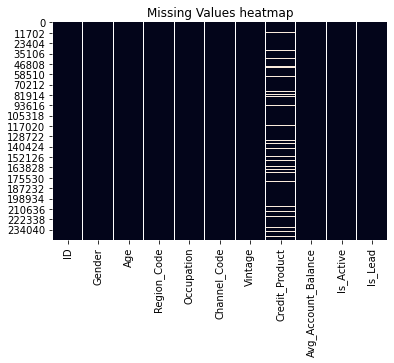

In [12]:
#To check the values missing in each column.

sns.heatmap(train.isna(),cbar=False).set_title("Missing Values heatmap")

In [13]:
# how many total missing values do we have?

total_cells = np.product(train.shape)
total_missing = missing_values_count.sum()


# percent of data that is missing

percent_missing = (total_missing/total_cells) * 100
print("Shape of Data is:",train.shape)
print("Total cells present in  tha data is:",total_cells)
print("Missing Data in the dataset:",total_missing)
print("Total percentage of missing datas:",percent_missing)


Shape of Data is: (245725, 11)
Total cells present in  tha data is: 2702975
Missing Data in the dataset: 29325
Total percentage of missing datas: 1.0849156947437546


In [14]:
#  To get the number of missing data points per column

missing_values_count_test=test.isna().sum()
missing_values_count_test

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

Text(0.5, 1.0, 'Missing Values heatmap')

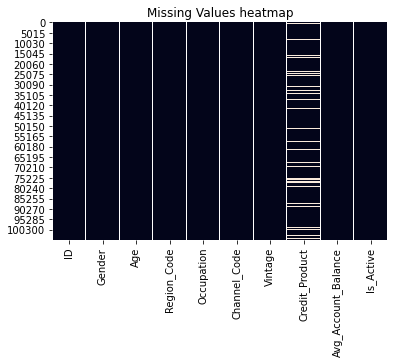

In [15]:
#To check the values missing in each column.

sns.heatmap(test.isna(),cbar=False).set_title("Missing Values heatmap")

In [16]:
# how many total missing values do we have?

total_cells_test = np.product(test.shape)
total_missing_test = missing_values_count_test.sum()


# percent of data that is missing

percent_missing_test = (total_missing_test/total_cells_test) * 100
print("Shape of Data is:",test.shape)
print("Total cells present in  tha data is:",total_cells_test)
print("Missing Data in the dataset:",total_missing_test)
print("Total percentage of missing datas:",percent_missing_test)

Shape of Data is: (105312, 10)
Total cells present in  tha data is: 1053120
Missing Data in the dataset: 12522
Total percentage of missing datas: 1.189038286235187


The ID variable is not to be used for prediction. 
Hence it can be dropped.


In [17]:
#drop the ID column from the analysis 
train.drop(["ID"],axis=1,inplace=True)
#drop the column from the test dataset 
test.drop('ID',axis=1,inplace=True)

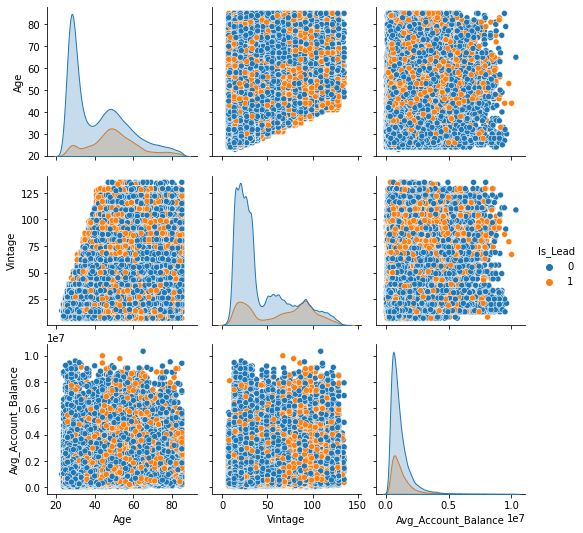

In [18]:
#create pair plot
sns.pairplot(data=train,hue='Is_Lead',diag_kind='kde')
plt.show()

The kde plots on the diagonal are throwing some interesting insight on the data.

The Age feature clearly has clusters of more rightly bins. One age group is younger between 20 to 40 years of age while the other is 40 to 60 years of Age. There are also customer 60 and 80 years of age but their numbers are not as high compared to the younger age groups.Secondly, those in the 40 to 60 age range have leads whereas the younger ones are not.Perhaps, this could be associated with the Vintage which would be more visible for the higher age group

_Vintage_ is a colloquial term used to describe mortgage-backed securities (MBS) that have been "seasoned." That is, they've been issued long enough, and enough on-time payments have been made, that the risk of default is lower. Vintage is the age of an item as it relates to the year it was created. Lower vintages has more 1 credit card lead while the higher values have not. Could it be that the one who have higher vintage would be least interested to go for a credit card as they might have funds already after a number of on time payments have been made

The average account balance for both the leads 0 and 1 appears to be similar and currently appears not to be one of the main deciding feature to classify the credit card lead

_The kde plot on the diagonal for the Age and Vintage clearly indicates there are separate clusters in the data and separate models based on these clusters can also be a viable option for actual production_

_Credit product_ feature has a lot of missing values. As per the meta data, this feature reflects any active credit product like home loan, personal loan or credit card that the customer already has. The feature is boolean and it is difficult to make a choice for these customers where the data is missing.



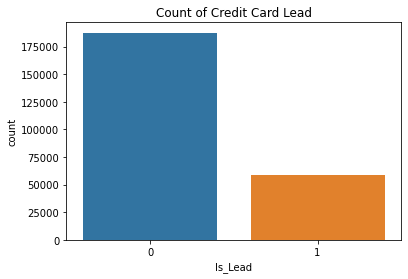

In [19]:
#check the balance of the data wrt the target feature
sns.countplot('Is_Lead',data=train)
plt.title('Count of Credit Card Lead')
plt.show()

In [20]:
#check the exact number of target labels per class
train['Is_Lead'].value_counts().sort_values(ascending=False)

0    187437
1     58288
Name: Is_Lead, dtype: int64

The number of leads is roughly 31% of the customer without credit card lead. The data is imbalanced as expected. The split of the data can be based on stratification methodology to have similar representation in the train and validation split

In [21]:
#create separate list of numerical and categorical features
cat_features = train.select_dtypes(include='object').columns.to_list()
num_features = train.select_dtypes(exclude='object').columns.to_list()

In [22]:
#check the unique value counts per categorical feature
for col in cat_features:
    print('\n')
    print(train[col].value_counts().sort_values(ascending=False))



Male      134197
Female    111528
Name: Gender, dtype: int64


RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64


Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64


X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64


No     144357
Yes     72043
Name: Credit_Product, dtype: int64


No     150290
Yes     95435
Name: Is_Active, dtype: int64


There are quite a lot of customers who are not active in the last 3 months compared to those who are active
There are much more customers without any credit product compared to the ones that have it
Self employed customers followed by salaried form the majority

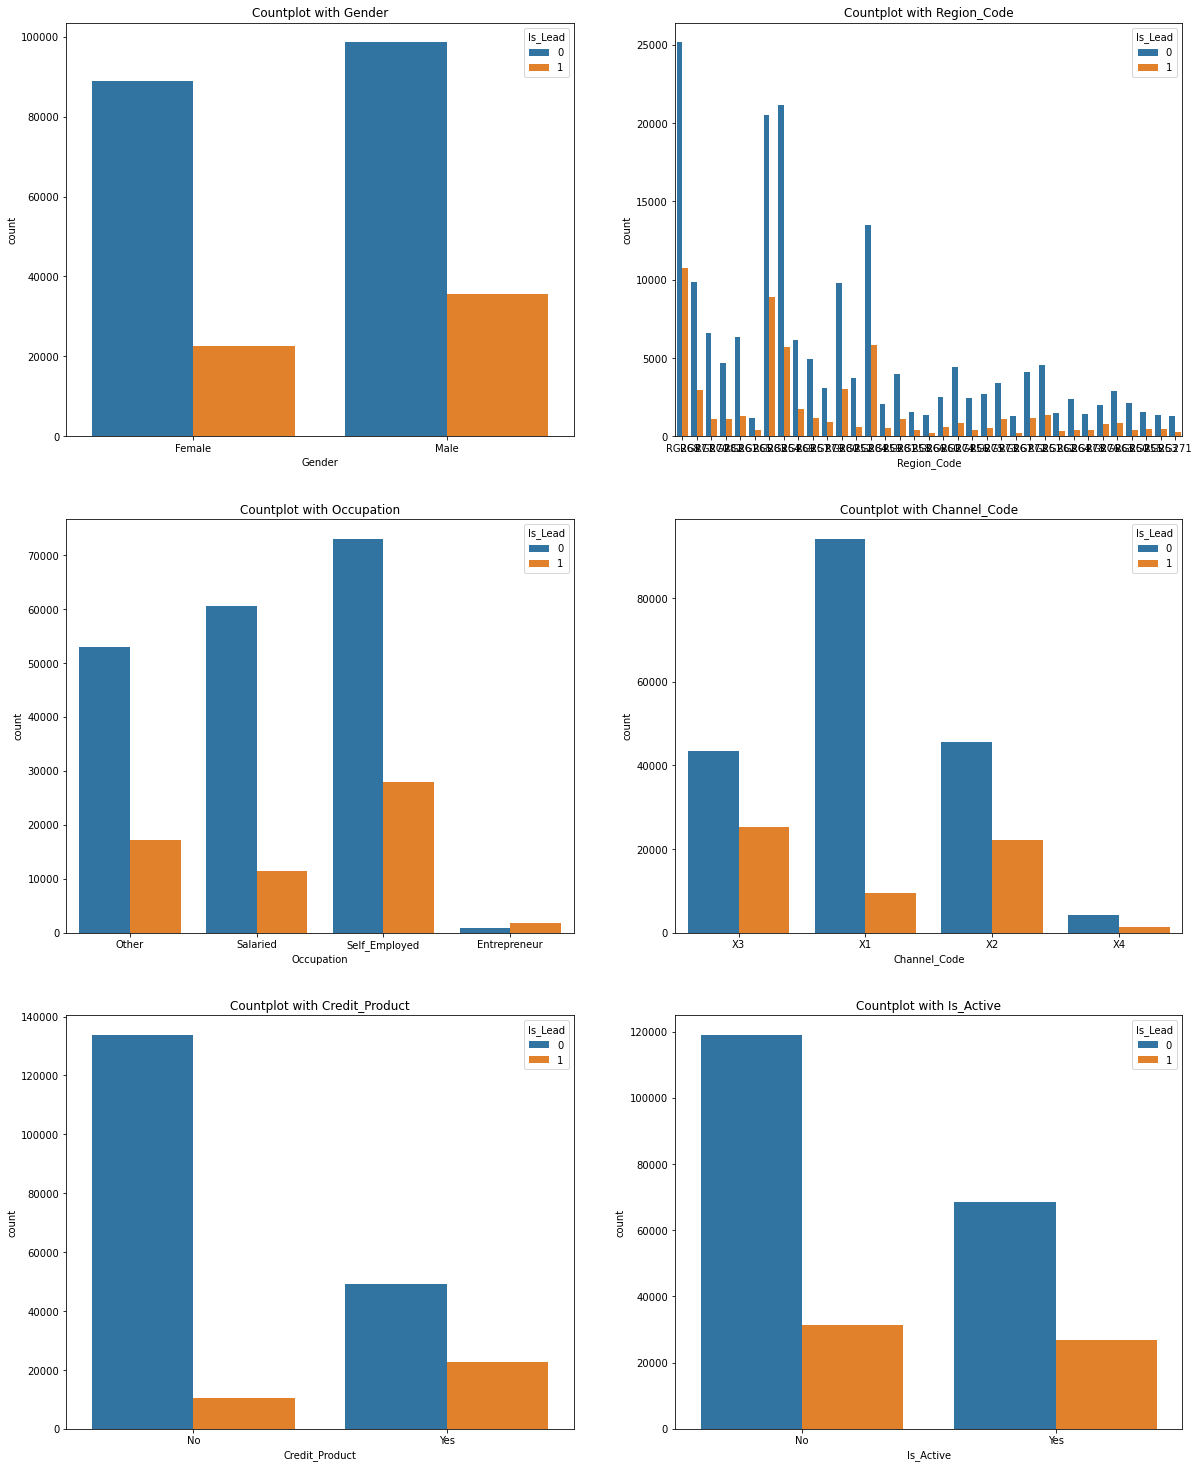

In [23]:
#countplot of all the categorical features 
fig = plt.figure(figsize=(20, 35))
for index, col in enumerate(cat_features):
    plt.subplot(4, 2, index+1)
    sns.countplot(data=train, x=col,hue='Is_Lead') 
    plt.title('Countplot with '+col)

Following observations can be derived from the countplot

The proportion of leads for customers with a credit product is higher compared to those who do not have a credit product
The proportion of leads for active customers is higher compared to the non active customers
Channel code X3 and X2 have higher positive leads compared to the other channels
The gender of the customer does not really matter in deciding who has a better lead
Some of the region codes contribute to the maximum positive credit card leads

In [24]:
#check the numerical features
num_features

['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead']

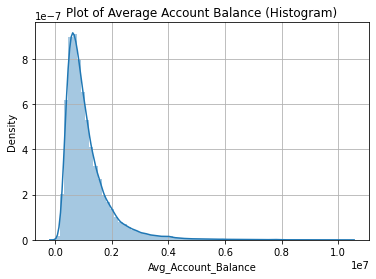

In [25]:
sns.distplot(train['Avg_Account_Balance'],bins=70)
plt.title('Plot of Average Account Balance (Histogram)')
plt.grid()
plt.show()

The average account balance as expected is right skewed

In [26]:
#test for normality -- > clearly the data is not normal
from scipy.stats import shapiro
stats,p = shapiro(train['Avg_Account_Balance'])
print('p-value for the Shapiro wilk test %.3f'% (p))
if p>0.05:
    
    print('Data is probably Gaussian')
else:
    print('Data is probably not Gaussian')

p-value for the Shapiro wilk test 0.000
Data is probably not Gaussian


C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


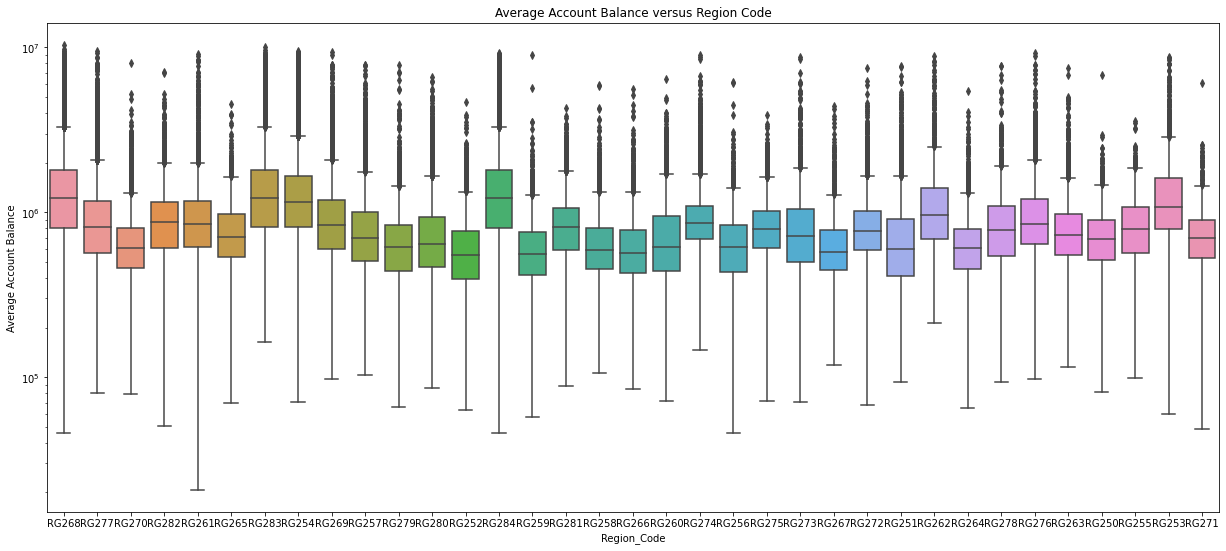

In [27]:
#boxplot of the avg account balance vs the region code
plt.figure(figsize=(21,9))
sns.boxplot(x= 'Region_Code',y='Avg_Account_Balance',data=train)
plt.title(f'Average Account Balance versus Region Code')
plt.ylabel('Average Account Balance')
plt.yscale('log')
plt.show()

There is strong variation of the average account balance based on the region code

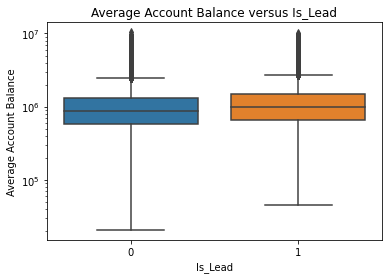

In [28]:
#boxplot of the avg account balance vs the region code
sns.boxplot(x= 'Is_Lead',y='Avg_Account_Balance',data=train)
plt.title(f'Average Account Balance versus Is_Lead')
plt.ylabel('Average Account Balance')
plt.yscale('log')
plt.show()


The median account balance of the customer is higher for the customer who are positive leads for a credit card

In [29]:
#check the correlation
train[['Age','Vintage','Avg_Account_Balance']].corr()


,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.631242,0.145232
Vintage,0.631242,1.000000,0.167433
Avg_Account_Balance,0.145232,0.167433,1.000000


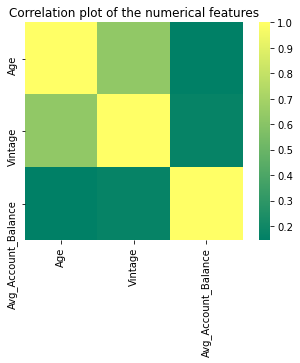

In [30]:
#visualise the correlation 
sns.heatmap(train[['Age','Vintage','Avg_Account_Balance']].corr(),square=True,cmap='summer')
plt.title('Correlation plot of the numerical features')
plt.show()

Age and Vintage have high correlation while it cannot be said for the other features

In [31]:
#create a cross table of region code and credit card lead
region_code_lead = train.groupby(['Region_Code','Is_Lead']).size().unstack().fillna(0)
region_code_lead

Is_Lead,0,1
Region_Code,,
RG250,2103,393
RG251,4569,1381
RG252,3694,592
RG253,1377,481
RG254,21127,5713
RG255,1549,469
RG256,2446,401
RG257,4931,1170
RG258,1521,430


### Chi-Square Test

In [32]:
#chi-square test
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    '''
    The function performs the chi-square test between two categorical features
    Arguments: dataframe df, columns c1 and c2
    Returns: Chi-square test parameters critical stat, p-value,degrees of freedom and expected
    '''
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    return(chi2_contingency(ctsum.fillna(0)))

#perform chi square test on the categorical features
stat, p, dof, expected = chisq_of_df_cols(train, 'Region_Code', 'Is_Lead')

#determine whether dependent or independent based on the p-value
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


stat=3913.670, p=0.000
Probably dependent


_Customer credit card lead and region code are dependent according to the chi-square test_

In [33]:
#chi square test between occupation and is lead
stat, p, dof, expected = chisq_of_df_cols(train, 'Credit_Product', 'Is_Lead')

#determine whether dependent or independent based on the p-value
print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=21494.009, p=0.00000
Probably dependent


_Is Lead is also dependent on the occupation of the customer. While this was apparent from the earlier countplots, the statistical test also proves it to be significant_

### Split the dataset


In [34]:
#define a seed to be used
seed = 51
test_ratio = 0.2

In [35]:
#split into the train and validation test
from sklearn.model_selection import train_test_split
#split based on stratified on the Is_Lead to have similar representation in train and test data
train_set,valid_set = train_test_split(train,test_size=test_ratio,random_state=seed,stratify=train['Is_Lead'])
#print the shape of the split data
print(train_set.shape,valid_set.shape)

(196580, 10) (49145, 10)


In [36]:
#check the proportion split in the train set 
train_set['Is_Lead'].value_counts() / len(train_set)

0    0.762794
1    0.237206
Name: Is_Lead, dtype: float64

In [37]:
#check the proportion split in the valid set 
valid_set['Is_Lead'].value_counts() / len(valid_set)

0    0.762784
1    0.237216
Name: Is_Lead, dtype: float64

The split is the train and valid set is similar with respect to the target class

In [38]:
#cut the Age feature into categorical bins 
train_set['Age_Category'] = pd.cut(train_set['Age'],bins=[20,40,60,80,90])
valid_set['Age_Category'] = pd.cut(valid_set['Age'],bins=[20,40,60,80,90])
test['Age_Category'] = pd.cut(test['Age'],bins=[20,40,60,80,90])

<ipython-input-38-02859aeb0a39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Age_Category'] = pd.cut(train_set['Age'],bins=[20,40,60,80,90])
<ipython-input-38-02859aeb0a39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_set['Age_Category'] = pd.cut(valid_set['Age'],bins=[20,40,60,80,90])


In [39]:
train_set.head(2)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_Category
141578,Female,33,RG283,Salaried,X1,32,NaN,1504491,Yes,0,"(20, 40]"
78168,Male,40,RG283,Self_Employed,X2,27,Yes,1441622,Yes,0,"(20, 40]"


In [40]:
#drop the redundant Age feature
train_set.drop('Age',axis=1,inplace=True)
valid_set.drop('Age',axis=1,inplace=True)
test.drop('Age',axis=1,inplace=True)

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196580 entries, 141578 to 113641
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Gender               196580 non-null  object  
 1   Region_Code          196580 non-null  object  
 2   Occupation           196580 non-null  object  
 3   Channel_Code         196580 non-null  object  
 4   Vintage              196580 non-null  int64   
 5   Credit_Product       173091 non-null  object  
 6   Avg_Account_Balance  196580 non-null  int64   
 7   Is_Active            196580 non-null  object  
 8   Is_Lead              196580 non-null  int64   
 9   Age_Category         196580 non-null  category
dtypes: category(1), int64(3), object(6)
memory usage: 15.2+ MB


In [42]:
#split the shuffled data into train and target features
X_train = train_set.drop('Is_Lead',axis=1)
y_train = train_set['Is_Lead']

X_valid = valid_set.drop('Is_Lead',axis=1)
y_valid = valid_set['Is_Lead']


Label encode the categorical features

In [43]:
#remove the credit product from the cat features to prevent encoding null values 
cat_features = X_train.select_dtypes(include=['object','category']).columns.to_list()
#cat_features.remove('Credit_Product')

In [44]:
cat_features

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active',
 'Age_Category']

In [45]:
#label encode the categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#encode all the cat features
warnings.filterwarnings(action='ignore',message='')
for col in cat_features:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_valid[col] = encoder.transform(X_valid[col])
    test[col] = encoder.transform(test[col])
X_train.head()

,Gender,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Age_Category
141578,0,33,2,0,32,2,1504491,1,0
78168,1,33,3,1,27,1,1441622,1,0
211965,1,30,2,0,19,0,400651,0,0
138138,1,1,3,1,37,0,393477,1,1
78509,1,2,3,0,25,0,2094063,0,0


_Important to note that the missing values in CreditProduct got encoded to a different value. Instead of imputing with the most frequent value using simple imputer would not have been a reasonable choice unless it is advocated by the bank

Another standby option is to use the iterative imputer which would first require the column to be changed to integer type and then iterative apply regression technique to impute the missing values.

In [46]:
test.head(2)

,Gender,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Age_Category
0,1,4,1,0,25,1,742366,0,0
1,1,18,1,1,49,2,925537,0,1


In [47]:
test['Gender'].unique()

array([1, 0])

#### Power Transformation & Scaling

In [48]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
pt = PowerTransformer()
scaler = StandardScaler()

#apply the transformation
X_train = pt.fit_transform(X_train)
X_valid = pt.transform(X_valid)
test = pt.transform(test)
#apply the scaling
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
test = scaler.transform(test)

In [49]:
#check shape of y_train
y_train.shape

(196580,)

Rank-1 array can lead to serious bugs in modeling and production. 
Reshape it to proper 2D array with the second dimension as 1

In [50]:
#reshape the target array 
y_train = y_train.values
y_valid = y_valid.values
y_train = y_train.reshape(y_train.shape[0],1)
y_valid = y_valid.reshape(y_valid.shape[0],1)
print(y_train.shape,y_valid.shape)

(196580, 1) (49145, 1)


Dimensionality Reduction
So far all of the features are included and no feature engineering steps are performed specifically. While dimensionality reduction using PCA would help to remove the redundant feature, the performance of the model cannot be guranteed to be improved.

In [51]:
from sklearn.decomposition import PCA
num_components = [2,3,4,5,6]
#check the total explained variance ratio using different number of principal components 
for comp in num_components:
    pca = PCA(n_components=comp)
    X_train_pca = pca.fit_transform(X_train)
    print('Total Explained Variance Ratio using {} components = {}'.format(comp,np.sum(pca.explained_variance_ratio_)))

Total Explained Variance Ratio using 2 components = 0.45794321238144486
Total Explained Variance Ratio using 3 components = 0.5826621801723835
Total Explained Variance Ratio using 4 components = 0.7057452185740718
Total Explained Variance Ratio using 5 components = 0.8208645235148693
Total Explained Variance Ratio using 6 components = 0.9104253702758665


In [52]:
#apply the pca transformation
pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)
test = pca.transform(test)

In [53]:
#evaluation metrics
from sklearn.metrics import roc_auc_score

In [54]:
#concatenate to recreate the entire training data for final training and prediction 
X =  np.vstack((X_train,X_valid))
y =  np.vstack((y_train,y_valid))

In [55]:
X.shape,y.shape

((245725, 6), (245725, 1))

#### Deep Learning Model

In [58]:
#import the required tensorflow keras libraries
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
#keras wrapper for scikit learn to perform cross validation or grid search
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached grpcio-1.41.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached absl_py-0.14.0-py3-none-any.whl (131 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl 

In [59]:
#define the model --> required for the Keras Classifier class 
def create_model(optimizer='adam',init='glorot_uniform',dropout=0.0):
    model = Sequential()
    #add the layers
    model.add(Dense(units=500,input_dim=X_train.shape[1],activation='relu',kernel_initializer=init))
    model.add(Dense(units=300,activation='relu',kernel_initializer=init))
    model.add(Dropout(dropout))
    model.add(Dense(units=100,activation='relu',kernel_initializer=init))
    model.add(Dropout(dropout))
    model.add(Dense(units=50,activation='relu',kernel_initializer=init))
    model.add(Dropout(dropout))
    model.add(Dense(units=1,activation='sigmoid',kernel_initializer=init))
    #compile the model
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    #return the model
    return model

In [60]:
#define the early stop criteria
early_stop = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
#create the model
model = KerasClassifier(build_fn=create_model,epochs=100,batch_size=16,verbose=0)

In [61]:
model = create_model(optimizer='adam',dropout=0.25)
history = model.fit(X_train,y_train,epochs=100,callbacks=[early_stop],validation_data=(X_valid,y_valid),
          verbose=2)

Epoch 1/100
6144/6144 - 30s - loss: 0.3869 - accuracy: 0.8364 - val_loss: 0.3634 - val_accuracy: 0.8531
Epoch 2/100
6144/6144 - 25s - loss: 0.3654 - accuracy: 0.8534 - val_loss: 0.3584 - val_accuracy: 0.8542
Epoch 3/100
6144/6144 - 28s - loss: 0.3604 - accuracy: 0.8552 - val_loss: 0.3552 - val_accuracy: 0.8584
Epoch 4/100
6144/6144 - 26s - loss: 0.3596 - accuracy: 0.8546 - val_loss: 0.3524 - val_accuracy: 0.8579
Epoch 5/100
6144/6144 - 26s - loss: 0.3582 - accuracy: 0.8558 - val_loss: 0.3519 - val_accuracy: 0.8591
Epoch 6/100
6144/6144 - 27s - loss: 0.3575 - accuracy: 0.8563 - val_loss: 0.3524 - val_accuracy: 0.8588
Epoch 7/100
6144/6144 - 26s - loss: 0.3580 - accuracy: 0.8556 - val_loss: 0.3536 - val_accuracy: 0.8586
Epoch 8/100
6144/6144 - 27s - loss: 0.3567 - accuracy: 0.8560 - val_loss: 0.3511 - val_accuracy: 0.8592
Epoch 9/100
6144/6144 - 27s - loss: 0.3567 - accuracy: 0.8560 - val_loss: 0.3506 - val_accuracy: 0.8595
Epoch 10/100
6144/6144 - 26s - loss: 0.3573 - accuracy: 0.8559 -

In [62]:
valid_predictions = model.predict(X_valid)

In [63]:
model_score = model.evaluate(X_valid,y_valid,verbose=1)
print('%s: %.2f%% ' %(model.metrics_names[1],model_score[1]*100 ))

1536/1536 [==============================] - 5s 4ms/step - loss: 0.3482 - accuracy: 0.8602
accuracy: 86.02% 


In [64]:
#roc auc score on the validation set 
print(roc_auc_score(y_valid,valid_predictions))


0.8693496126521322


In [65]:
model.save('credit_lead_train_split.h5')

In [66]:
#train the final model on the entire dataset
history = model.fit(X,y,epochs=50,verbose=2,validation_split=0.1,callbacks=[early_stop])

Epoch 1/50
6911/6911 - 38s - loss: 0.3552 - accuracy: 0.8564 - val_loss: 0.3475 - val_accuracy: 0.8622
Epoch 2/50
6911/6911 - 35s - loss: 0.3545 - accuracy: 0.8571 - val_loss: 0.3464 - val_accuracy: 0.8609
Epoch 3/50
6911/6911 - 32s - loss: 0.3545 - accuracy: 0.8571 - val_loss: 0.3487 - val_accuracy: 0.8558
Epoch 4/50
6911/6911 - 31s - loss: 0.3548 - accuracy: 0.8568 - val_loss: 0.3471 - val_accuracy: 0.8611
Epoch 5/50
6911/6911 - 36s - loss: 0.3544 - accuracy: 0.8568 - val_loss: 0.3467 - val_accuracy: 0.8616
Epoch 6/50
6911/6911 - 34s - loss: 0.3542 - accuracy: 0.8577 - val_loss: 0.3474 - val_accuracy: 0.8592
Epoch 7/50
6911/6911 - 34s - loss: 0.3548 - accuracy: 0.8564 - val_loss: 0.3465 - val_accuracy: 0.8607
Epoch 8/50
6911/6911 - 34s - loss: 0.3543 - accuracy: 0.8568 - val_loss: 0.3463 - val_accuracy: 0.8610
Epoch 9/50
6911/6911 - 37s - loss: 0.3551 - accuracy: 0.8560 - val_loss: 0.3457 - val_accuracy: 0.8611
Epoch 10/50
6911/6911 - 42s - loss: 0.3540 - accuracy: 0.8571 - val_loss:

In [69]:
#predictions on the test dataset
test_predictions = model.predict(test)

In [71]:
#roc auc score on the validation set 
print(roc_auc_score(y_valid,valid_predictions))

0.8693496126521322
